In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel("C:dataset.xlsx")
df.head()

,S.No,power_rating,weight_of_copper,category
0,0,16.46,34.69,high
1,1,12.52,28.78,high
2,2,7.66,21.48,low
3,3,21.09,41.64,high
4,4,24.43,46.64,high


In [3]:
df = df.drop("S.No", axis =1)
df.head()

,power_rating,weight_of_copper,category
0,16.46,34.69,high
1,12.52,28.78,high
2,7.66,21.48,low
3,21.09,41.64,high
4,24.43,46.64,high


In [4]:
K = {'low':0, 'high':1}
df['category'] = df['category'].map(K)
X = df[["power_rating","weight_of_copper"]]
Y = df[["category"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =0.33,random_state =40)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth =2, random_state =0)
clf.fit(X_train, y_train.values.ravel())

,n_estimators,100
,criterion,'gini'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [5]:
y_pred = clf.predict (X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
print("accuracy score", accuracy_score(y_test, y_pred))
print("mean_squared_error",mean_squared_error(y_test, y_pred))
from sklearn.metrics import confusion_matrix

accuracy score 0.8666666666666667
mean_squared_error 0.13333333333333333


In [7]:
y_true = y_test
data = confusion_matrix(y_true, y_pred)
data

array([[ 0,  2],
       [ 0, 13]])

In [8]:
import seaborn as sn
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index =np.unique(y_true))
df_cm.index.name = "Actual"
df_cm.columns.name = "Predicted"
plt.figure(figsize =(10,7))
sn.set(font_scale =1.4)
df_cm

Predicted,0,1
Actual,,
0,0,2
1,0,13


<Figure size 1000x700 with 0 Axes>

<Axes: xlabel='Predicted', ylabel='Actual'>

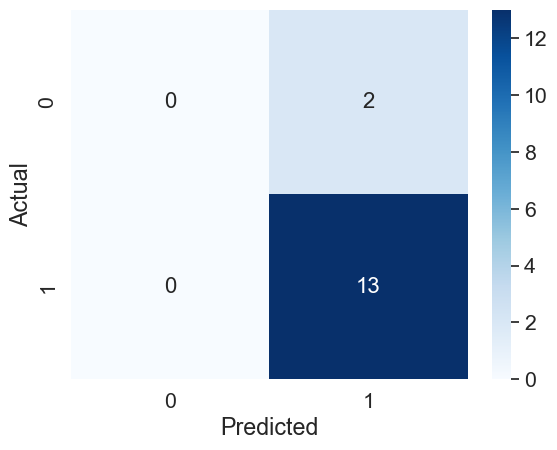

In [9]:
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size":16})